In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [2]:
db_conn = sqlite3.connect('../sqlite_files/cricket.sqlite')

In [3]:
cricket_df = pd.read_sql('''
             SELECT * FROM  sqlite_master 
             WHERE type = 'table'
             ''', db_conn)
cricket_df.head()

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,CREATE TABLE [Player] (\n\t[Player_Id]\tintege...
1,table,Extra_Runs,Extra_Runs,3,CREATE TABLE [Extra_Runs] (\n\t[Match_Id]\tint...
2,table,Batsman_Scored,Batsman_Scored,7,CREATE TABLE [Batsman_Scored] (\n\t[Match_Id]\...
3,table,Batting_Style,Batting_Style,10,CREATE TABLE [Batting_Style] (\n\t[Batting_Id]...
4,table,Bowling_Style,Bowling_Style,11,CREATE TABLE [Bowling_Style] (\n\t[Bowling_Id]...


In [4]:
print('The list of tables in the database','='*22,
      cricket_df.tbl_name,sep = '\n')

The list of tables in the database
0              Player
1          Extra_Runs
2      Batsman_Scored
3       Batting_Style
4       Bowling_Style
5             Country
6              Season
7                City
8             Outcome
9              Win_By
10       Wicket_Taken
11              Venue
12         Extra_Type
13           Out_Type
14      Toss_Decision
15             Umpire
16               Team
17       Ball_by_Ball
18        sysdiagrams
19    sqlite_sequence
20              Match
21              Rolee
22       Player_Match
Name: tbl_name, dtype: object


In [5]:
players_country = pd.read_sql('''
       SELECT  Country.Country_Name, 
               COUNT(*) AS Number_of_players FROM Player
       LEFT JOIN Country ON Country.Country_Id = Player.Country_Name
       LEFT JOIN Batting_Style ON Batting_Style.Batting_Id = Player.Batting_hand
       LEFT JOIN Bowling_Style ON Bowling_Style.Bowling_ID = Player.Bowling_skill
       GROUP BY Player.Country_Name
       ORDER BY Number_of_players DESC
       ''', db_conn)

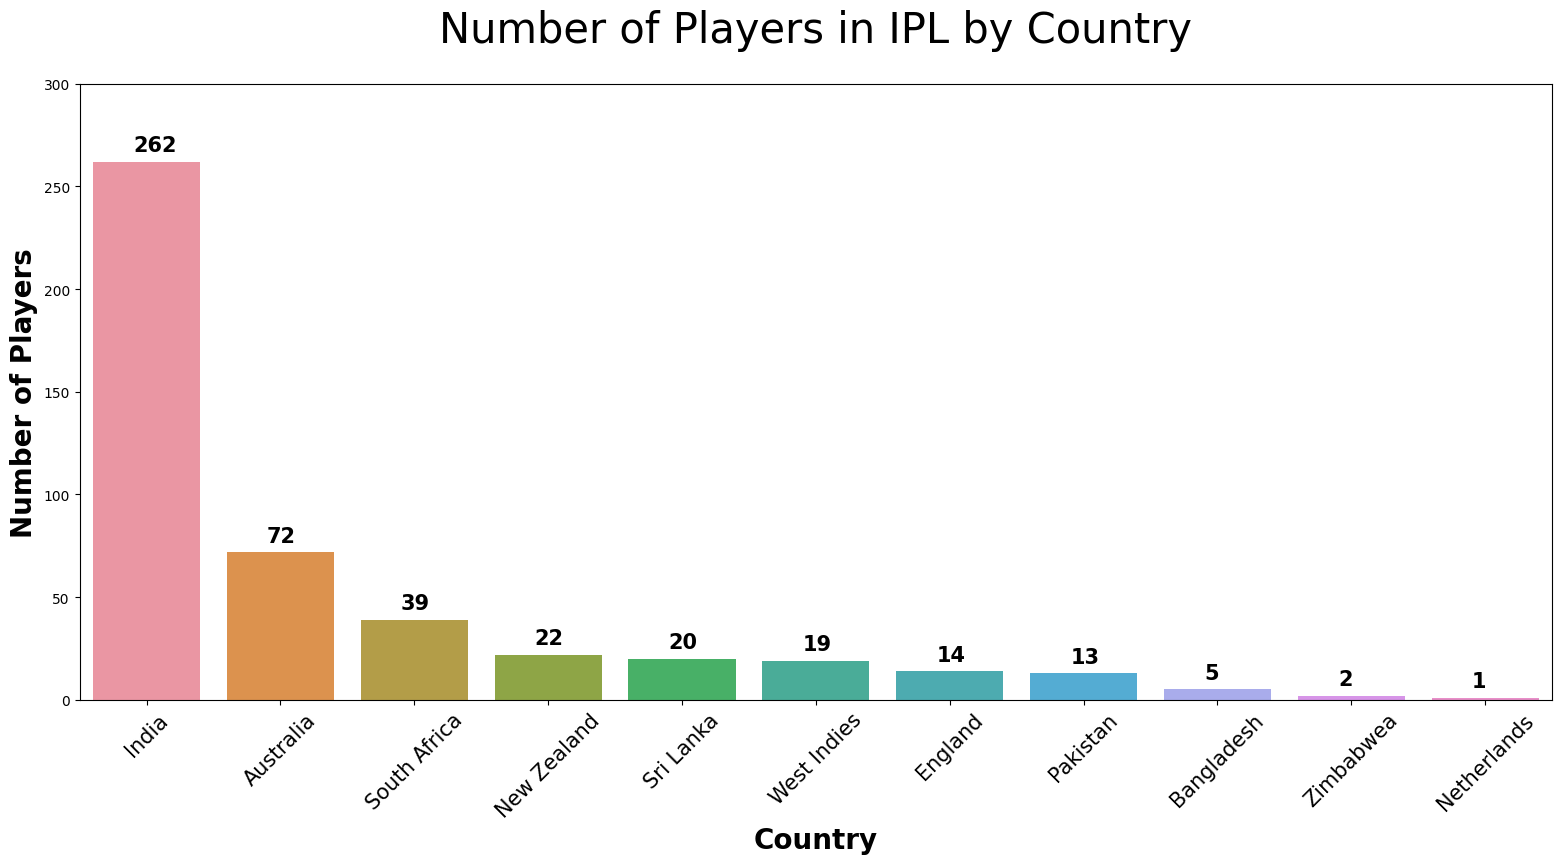

In [7]:
plt.figure(figsize = (19,8))
sns.barplot(x = 'Country_Name', y = 'Number_of_players', data = players_country)
plt.title('Number of Players in IPL by Country',fontsize = 30 , pad = 30)
plt.xlabel('Country', fontsize = 20, weight = 'bold')
plt.ylabel('Number of Players', fontsize = 20, weight = 'bold')
plt.xticks(rotation = 45 , horizontalalignment='center',fontsize = 15)
plt.ylim(0,300)
#Place labels on the side of the bars
labels = players_country.Number_of_players.tolist()
for i in range(len(players_country)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = i - 0.1, y = players_country.iloc[i,1]+5, s = (labels[i]))
plt.show()

In [9]:
stadium_list = pd.read_sql('''
      SELECT Venue_Name, Count(*) AS Number_of_matches FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      GROUP BY Venue_Name
      ORDER BY Number_of_matches DESC
      '''                        
        , db_conn)
stadium_list.head()

,Venue_Name,Number_of_matches
0,M Chinnaswamy Stadium,58
1,Eden Gardens,54
2,Feroz Shah Kotla,53
3,Wankhede Stadium,49
4,"MA Chidambaram Stadium, Chepauk",48


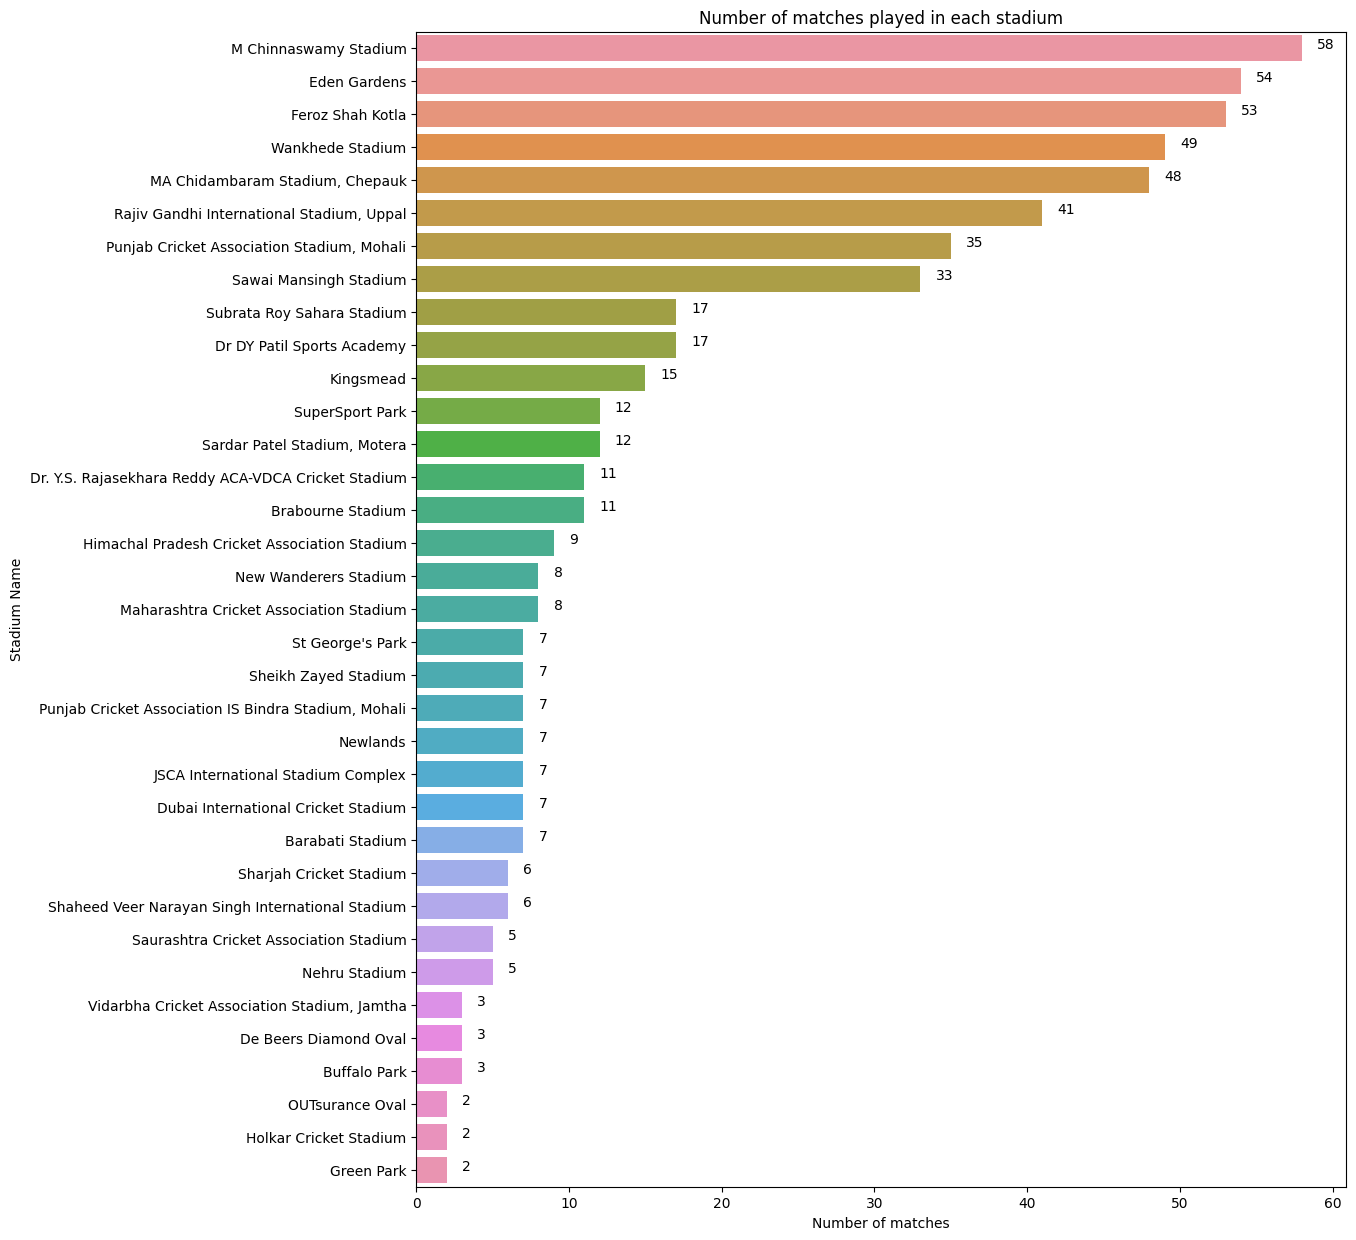

In [36]:
plt.figure(figsize = (12,15))
sns.barplot(y = 'Venue_Name', x = 'Number_of_matches', data = stadium_list)
plt.title('Number of matches played in each stadium')
plt.xlabel('Number of matches')
plt.ylabel('Stadium Name')
#Place labels on the side of the bars
labels = stadium_list.Number_of_matches.tolist()
for i in range(len(stadium_list)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = stadium_list.iloc[i,1] + 1, y = i, s = (labels[i]))
plt.show()

In [17]:
city_list = pd.read_sql('''
      SELECT City_Name, 
             COUNT(*) AS Number_of_matches
      FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      LEFT JOIN City ON City.City_id = Venue.City_Id
      GROUP BY City_Name
      ORDER BY Number_of_matches DESC
      '''
        , db_conn)

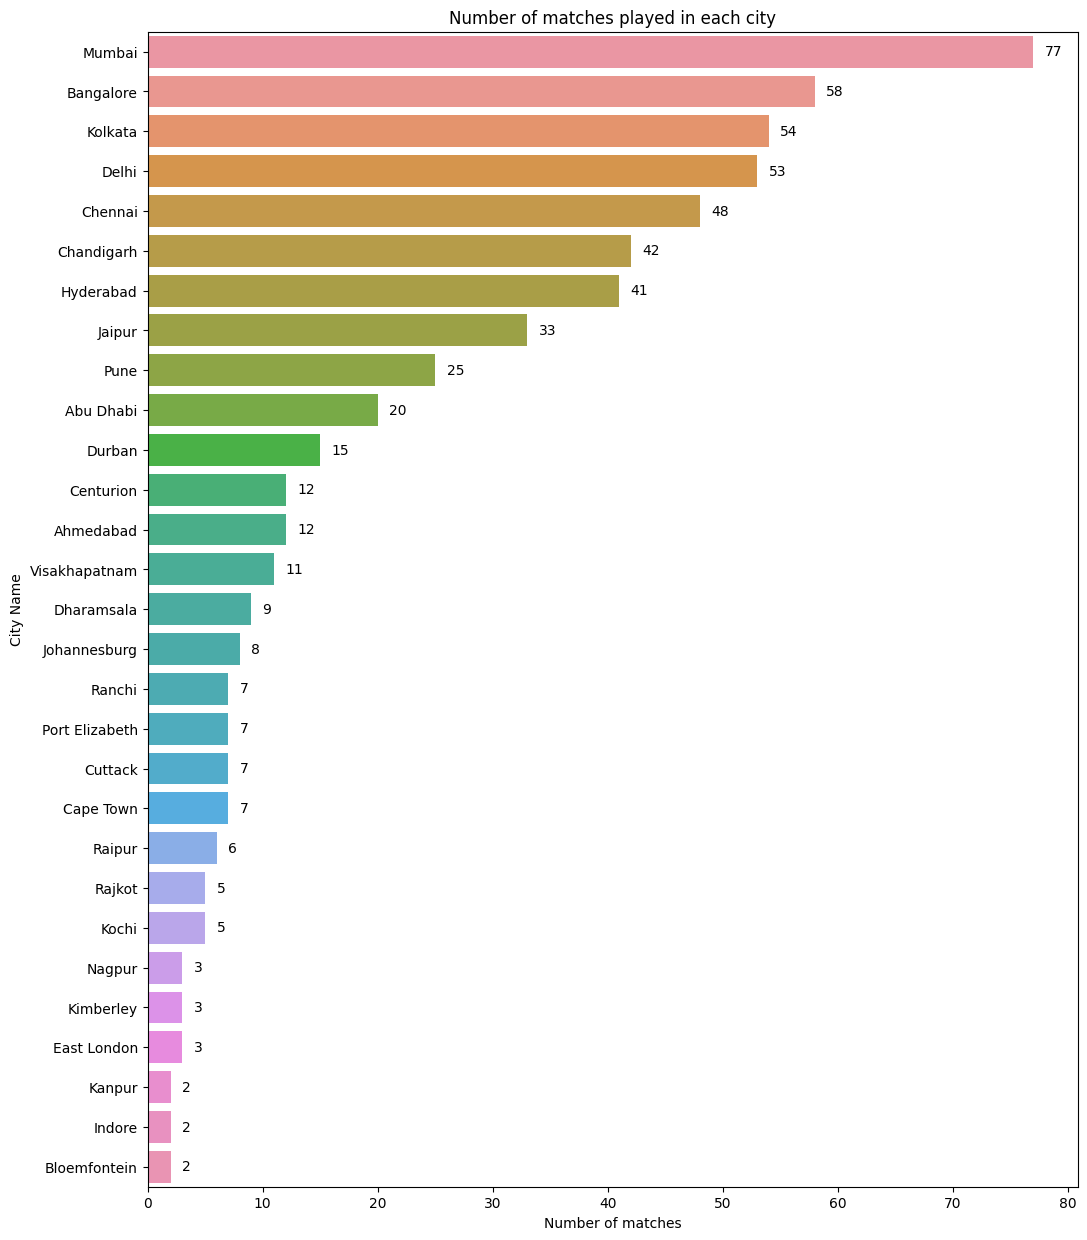

In [35]:
plt.figure(figsize = (12,15))
sns.barplot(y = 'City_Name', x = 'Number_of_matches', data = city_list)
plt.title('Number of matches played in each city')
plt.xlabel('Number of matches')
plt.ylabel('City Name')
#Place labels on the side of the bars
labels = city_list.Number_of_matches.tolist()
for i in range(len(city_list)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = city_list.iloc[i,1] + 1, y = i +0.1, s = (labels[i]))
plt.show()

In [20]:
total_runs_over = pd.read_sql('''
   SELECT Over_ID AS Over_No,
        Sum(Runs_Scored) FROM Batsman_Scored
   GROUP BY Over_Id
  ''', db_conn)
total_runs_over.head()

,Over_No,Sum(Runs_Scored)
0,1,6240
1,2,7407
2,3,8176
3,4,8685
4,5,8758


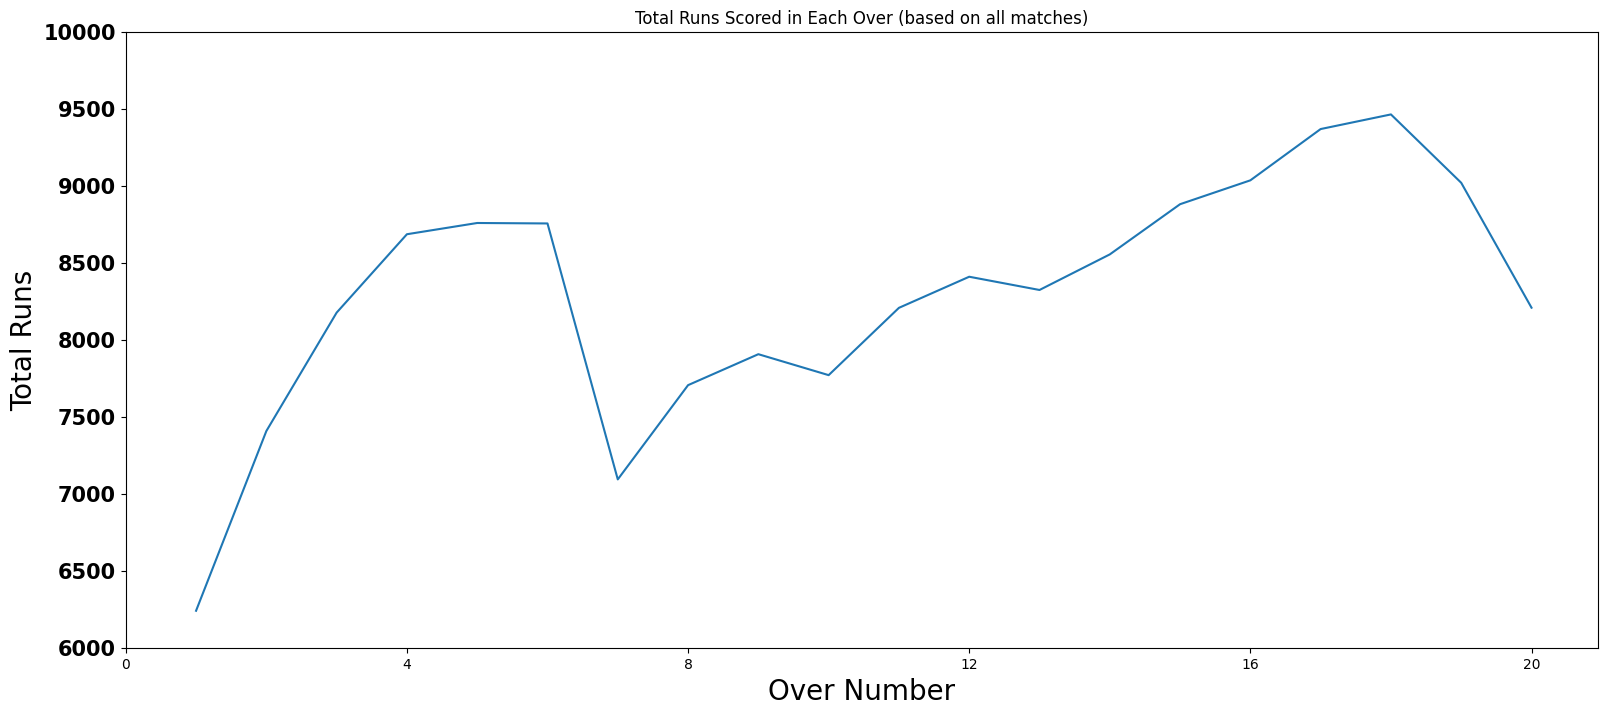

In [24]:
plt.figure(figsize = (19,8))
sns.lineplot(x = 'Over_No', y = 'Sum(Runs_Scored)', data = total_runs_over)
plt.title('Total Runs Scored in Each Over (based on all matches)')
plt.xlabel('Over Number', fontsize = 20)
plt.ylabel('Total Runs', fontsize = 20)
plt.xticks(ticks = [0,4,8,12,16,20])
plt.yticks(fontsize = 15, weight = 'bold')
plt.ylim(6000,10000)
plt.show()

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,501270,6,10,2011-05-21 00:00:00,4,3,6,2,3,None,2,None,None
1,829768,2,5,2015-04-29 00:00:00,8,1,5,1,3,None,2,None,None
2,829818,2,6,2015-05-17 00:00:00,8,1,2,1,3,None,2,None,None


In [33]:
wins_by_team = pd.read_sql('''
                        SELECT ifnull(Team_Name, 'No Result') as Team_Name, Count(*) 
                            AS Number_of_wins FROM Match
                        LEFT JOIN Team ON Team.Team_Id = Match.Match_Winner
                        GROUP BY Team_Name
                        ORDER BY Number_of_wins DESC
                        ''',
                        db_conn  )
wins_by_team.head()

,Team_Name,Number_of_wins
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Rajasthan Royals,63


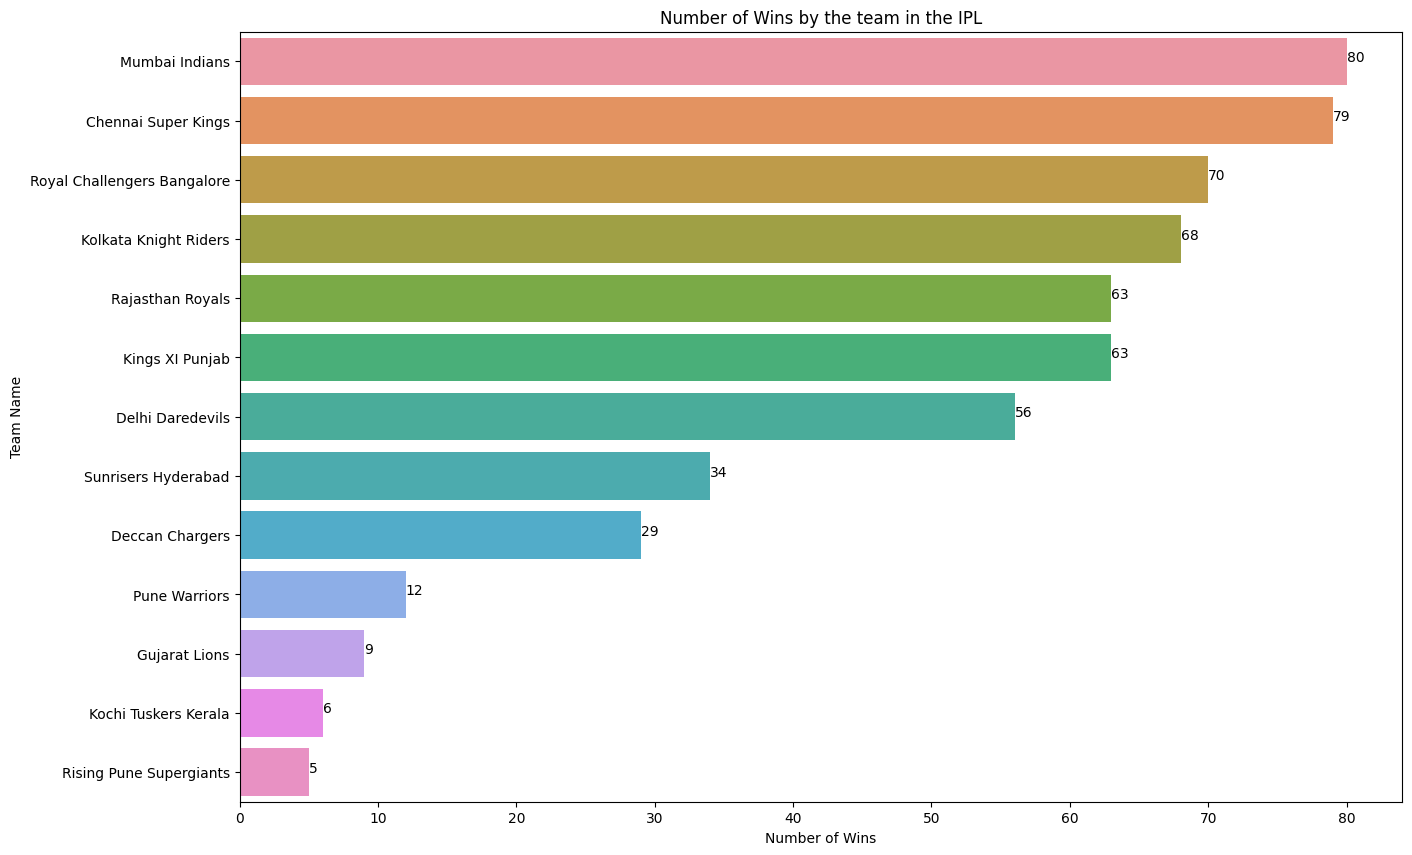

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'Team_Name', x = 'Number_of_wins', data = wins_by_team.iloc[:-1,:])
plt.ylabel('Team Name')
plt.xlabel('Number of Wins' )
plt.title('Number of Wins by the team in the IPL')
#Place labels on the side of the bars
labels = wins_by_team.Number_of_wins.tolist()[:-1]
for i in range(len(wins_by_team)-1):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = wins_by_team.iloc[i,1], y = i, s = (labels[i]))
plt.show()